In [51]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.manifold import Isomap
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from scipy.io import loadmat
from sklearn.metrics import auc, accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import os
from PIL import Image


In [52]:
plt.style.use('ggplot')

plt.rcParams.update({
    "figure.facecolor":  (22/255, 22/255, 22/255, 0.85),
    "figure.figsize": (15, 10),
    "axes.facecolor":    (22/255, 22/255, 22/255, 0.2),
    "xtick.color": 'lightgrey',
    "ytick.color": 'lightgrey',
    "grid.alpha": 0.1,
    "grid.color": 'salmon',
    "xtick.labelsize": 13,
    "ytick.labelsize": 13,
    "axes.titlecolor": 'lightgrey',
    "axes.labelcolor": 'lightgrey',
    "axes.labelsize": 15,
    "text.color": 'white',
    "axes.titlecolor": "lightgrey",
    "legend.fontsize": 13
})

In [55]:
def result(y_test, prediction):

    sns.set()
    %matplotlib inline

    accuracy = accuracy_score(y_test, prediction)
    fpr, tpr, thresholds = roc_curve(y_test, prediction, pos_label=1)
    tn, fp, fn, tp = confusion_matrix(y_test, prediction).ravel()
    specificity = tn/(tn+fp)

    print('True Positives:', tp)
    print('True Negatives:', tn)
    print('False Positives:', fp)
    print('False Negatives:', fn)

    print(classification_report(y_test, prediction))
    print('Specificity {:0.2}'.format(specificity))
    print('Accuracy: %.3f%%' %(accuracy * 100.0))
    print('AUC: ', auc(fpr, tpr))

    return

In [3]:
BASE_PATH = '../../'
MAT_FILE = 'data/combined_data_mtx.mat'


In [4]:
combined_data_mtx = loadmat(BASE_PATH + MAT_FILE)


In [10]:
X = combined_data_mtx['img_array']

y = combined_data_mtx['bool_label'][0]

print('X', X[:5, :5])
print('y', y[:5])

X [[0.705882 0.690196 0.670588 0.654902 0.65098 ]
 [1.       1.       1.       1.       1.      ]
 [0.145098 0.152941 0.145098 0.152941 0.145098]
 [0.564706 0.611765 0.647059 0.658824 0.678431]
 [0.619608 0.615686 0.627451 0.607843 0.65098 ]]
y [1 1 1 1 1]


In [42]:
# Prepare labels
# Split the dataset into training and testing sets

X_train, X_test, y_train, y_test, idx_train, idx_test = train_test_split(X, y, np.arange(len(y)), test_size=0.2, random_state=42)

print(f'Size of x train: {X_train.shape}, Size of y_train: {y_train.shape}')

Size of x train: (1632, 360000), Size of y_train: (1632,)


In [74]:
pca_decomp = PCA(n_components=2, random_state=42)

pca_decomp.fit(X_train)
decomp_x = pca_decomp.transform(X_test)


C:\Users\david\AppData\Local\Temp\ipykernel_12932\3688904166.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


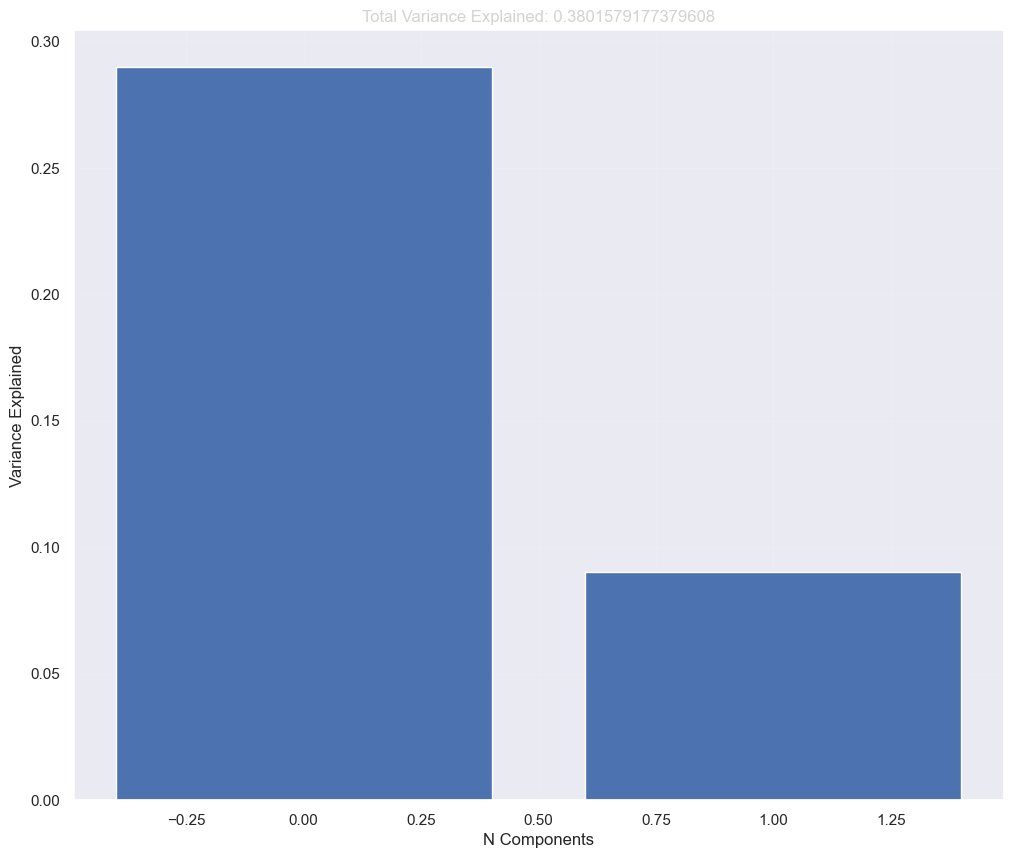

In [75]:
fig, axs = plt.subplots(figsize=(12, 10))

axs.bar(np.arange(len(pca_decomp.explained_variance_ratio_)), pca_decomp.explained_variance_ratio_)
axs.set_xlabel('N Components')
axs.set_ylabel('Variance Explained')
axs.set_title(f'Total Variance Explained: {sum(pca_decomp.explained_variance_ratio_)}')
fig.show()

C:\Users\david\AppData\Local\Temp\ipykernel_12932\1737149936.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


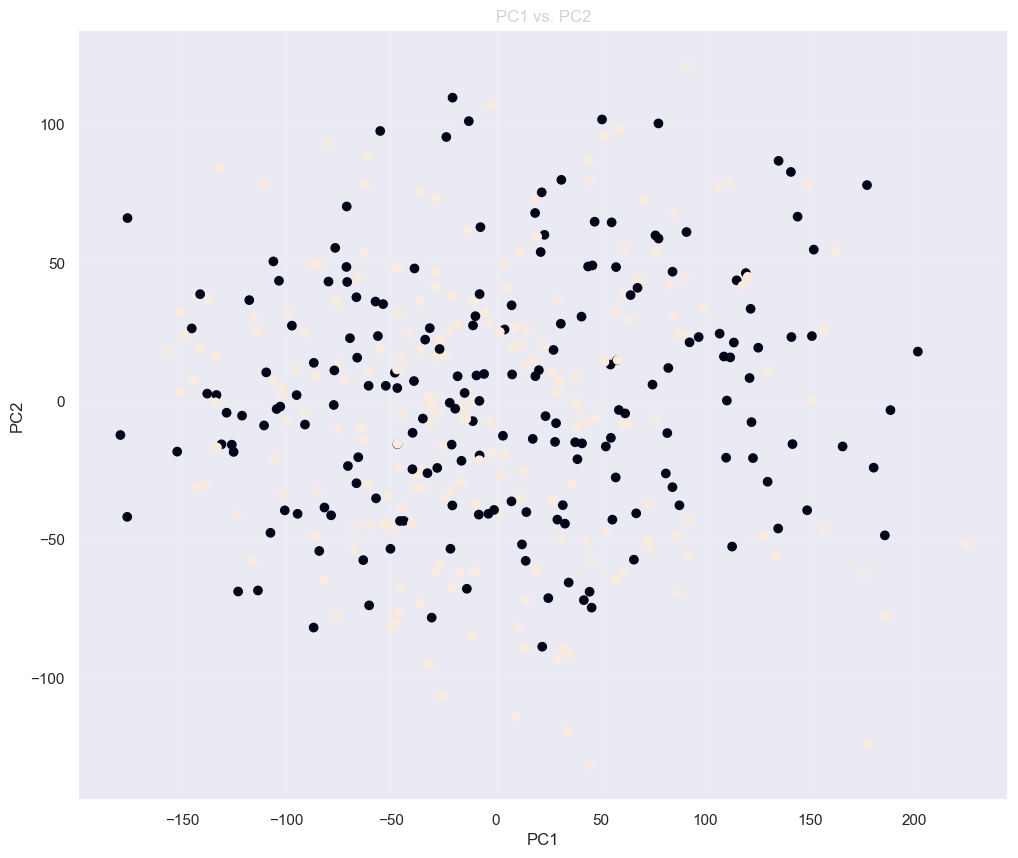

In [76]:
fig, axs = plt.subplots(figsize=(12, 10))

axs.scatter(decomp_x[:, 0], decomp_x[:, 1], c=y_test)
axs.set_xlabel('PC1')
axs.set_ylabel('PC2')
axs.set_title(f'PC1 vs. PC2')
fig.show()

In [77]:
isomap_decomp = Isomap(n_components=2, n_neighbors=7)

isomap_decomp.fit(X_train)
isomap_x = isomap_decomp.transform(X_test)


C:\Users\david\AppData\Local\Temp\ipykernel_12932\228958440.py:7: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


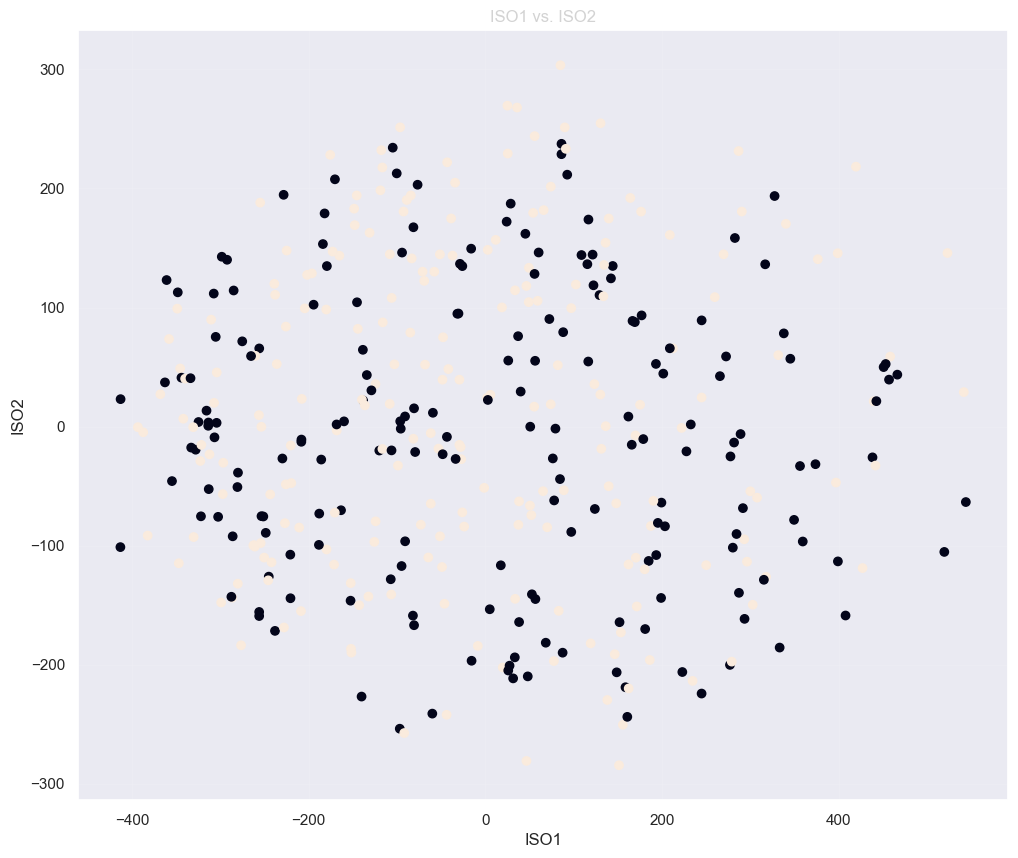

In [78]:
fig, axs = plt.subplots(figsize=(12, 10))

axs.scatter(isomap_x[:, 0], isomap_x[:, 1], c=y_test)
axs.set_xlabel('ISO1')
axs.set_ylabel('ISO2')
axs.set_title(f'ISO1 vs. ISO2')
fig.show()

In [72]:
km = KMeans(n_clusters=2, random_state=0)

km.fit(decomp_x)

km_x = km.predict(decomp_x)

km_x

C:\Users\david\Desktop\school\Data Science\de_connectors\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,

In [73]:
result(km_x, y_test)

True Positives: 130
True Negatives: 92
False Positives: 88
False Negatives: 99
              precision    recall  f1-score   support

           0       0.48      0.51      0.50       180
           1       0.60      0.57      0.58       229

    accuracy                           0.54       409
   macro avg       0.54      0.54      0.54       409
weighted avg       0.55      0.54      0.54       409

Specificity 0.51
Accuracy: 54.279%
AUC:  0.5393983503153809
